# 학습 내용
 - 3.1 Pytorch CIFAR10 - CNN(새로운 데이터셋인 CIFAR-10과 데이터 증강(Data Augmentation)에 대하여 배운다
 - 3.2 Fine Tuning with Custom Dataset(사람과 원숭이 분류 모델 학습시키기)
 - 3.3 GAN으로 MNIST 데이터의 패턴을 학습하여 세상에 없는 글씨체를 만든다

# 3.1 Pytorch CIFAR-10 - CNN
 - CNN을 이용하여 새로운 데이터셋인 CIFAR-10을 분류하는 모델을 만들어본다
 - 데이터 증강(Data Augmentation) 기법을 이용해본다

## 3.1.1 PyTorch GPU 구동 가능 여부 확인하기
- Pytorch를 GPU로 구동할수 있는 조건인지를 확인한다
- 결과가 CPU로 나오면, 가상환경을 지우고 다시 깔아야 한다 (Pytorch, Keras 가상환경 만드는법.pptx 참조)

In [1]:
import torch
if torch.cuda.is_available() == True:
    device = 'cuda:0'
    print('현재 가상환경 GPU 사용 가능상태')
else:
    device = 'cpu'
    print('GPU 사용 불가능 상태')

현재 가상환경 GPU 사용 가능상태


In [2]:
# 교육 환경에서의 시드 고정
def seed(seed = 1234):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed() # 시드 고정

## 3.1.2 하이퍼 파라미터 설정
 - 모델 구동에 필요한 하이퍼 파라미터들을 설정한다
 - 하이퍼 파라미터 설정값에 따라서 모델의 구동 속도, 정확도, 학습 속도가 달라진다

In [3]:
batch_size = 32
maximum_epoch = 15
learning_rate = 0.01

## 3.1.3 데이터 로드 & 전처리
 - CIFAR-10 데이터를 다운로드 받는다
 - Train, Validation, Test 데이터를 분할해준다
 - 실습 시간을 고려하여 전체 데이터의 절반만 학습하는데 사용하도록 한다
 - 이미지를 56 * 56으로 Resize시킨다

In [4]:
seed() # 시드 고정
# Load dataset into python variable
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Resize, RandomHorizontalFlip, Normalize, RandomCrop
import numpy as np
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

input_transform = transforms.Compose([ToTensor(), Resize(56), RandomCrop(56, padding = 6), 
                                      RandomHorizontalFlip(), Normalize(mean, std)])

test_transform = transforms.Compose([ToTensor(), Resize(56), Normalize(mean, std)])

transform_for_show = transforms.Compose([ToTensor(), Resize(512)])

# 코딩타임(CIFAR10 데이터셋 다운로드) - 1분



##########

from torch.utils.data import random_split
train_data, valid_data, _ = random_split(train_data, [20000, 3000, 27000])
test_data = CIFAR10("./", train=False, transform=test_transform, download=True)

show_data = CIFAR10("./", train=True, transform=transform_for_show, download=True)

# Check the data
print('Train 길이: {}'.format(len(train_data)))
print('Valid 길이: {}'.format(len(valid_data)))
print('Test  길이: {}'.format(len(test_data)))

NameError: name 'train_data' is not defined

- Train / Validation / Test 데이터가 제대로 나뉘었는지 길이를 확인
- 데이터를 시각화하여 확인한다
- 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭 총 10가지 class로 이루어진 데이터셋이다
- 각 데이터마다 라벨이 존재한다

In [ ]:
print('모든 Class 출력: {}\n'.format(test_data.classes))

In [ ]:
# 모든 Class에 해당하는 사진 확인
seed() # 시드 고정
import matplotlib.pyplot as plt
import torchvision
cnt = 0
for img, label in show_data:
    if cnt == 10:
        break
    if label == cnt:
        cnt += 1
        img = torchvision.utils.make_grid(img)
        npimg = img.numpy()
        plt.title('Label: {}'.format(test_data.classes[label]))
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

### 데이터 로더 생성

In [ ]:
seed() # 시드 고정
# Create data loader
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, drop_last=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=batch_size, pin_memory=True)

## 3.1.4 학습에 필요한 기능 제작
- 모델 학습에 필요한 기능들(학습, 시각화, 결과 분석)등을 위해 필요한 기능들을 선언한다

## 3.1.5 모델 선언후 학습 - CNN with Data Augmentation(VGG11 따라하기)

### 모델 선언

In [ ]:
import torch.nn as nn

# Model
from torch.optim import Adam
def init_model():
    global net, loss_fn, optim
    net = CNN_Model().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optim = Adam(net.parameters(), lr=learning_rate)
  
  
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        
        # 코딩타임
        

        
        ##########
    
    def forward(self, data):
        conv_out = self.convolution_part(data)
        avg_out = self.channelavg_part(conv_out)
        avg_out_flatten = avg_out.reshape(avg_out.size(0), -1)
        classifier_out = self.classifier_part(avg_out_flatten)
        return classifier_out, conv_out

from torchsummary import summary as Summary
# Model structure check
Summary(CNN_Model().to(device), (3, 56, 56))

## 학습에 사용되는 함수
 - 초기화
 - 모델 구동
 - 학습 추이

### 초기화

In [ ]:
# 모델 초기화
from torch.optim import Adam
def init_model():
    plt.rc('font', size = 10)
    global net, loss_fn, optim
    net = CNN_Model().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optim = Adam(net.parameters(), lr=learning_rate)
    
# epoch 카운터 초기화
def init_epoch():
    global epoch_cnt
    epoch_cnt = 0

def init_log():
    plt.rc('font', size = 10)
    # 모든 Log를 초기화
    global log_stack, iter_log, tloss_log, tacc_log, vloss_log, vacc_log, time_log
    iter_log, tloss_log, tacc_log, vloss_log, vacc_log = [], [], [], [], []
    time_log, log_stack = [], []

### 모델 구동

In [ ]:
import gc
from torch.cuda import memory_allocated, empty_cache
def clear_memory():
    if device != 'cpu':
        empty_cache()
    gc.collect()
    
# 학습 알고리즘
import numpy as np
def epoch(data_loader, mode = 'train'):
    global epoch_cnt
    
    # 사용되는 변수 초기화
    iter_loss, iter_acc, last_grad_performed  = [], [], False
    
    # 1 iteration 학습 알고리즘(for문을 나오면 1 epoch 완료)
    for _data, _label in data_loader:
        data, label = _data.to(device), _label.to(device)
        
        # 1. Feed-forward
        if mode == 'train':
            net.train()
        else:
            # 학습때만 쓰이는 Dropout, Batch Mormalization을 미사용
            net.eval()

        result, _ = net(data) # 1 Batch에 대한 결과가 모든 Class에 대한 확률값으로
        _, out = torch.max(result, 1) # result에서 최대 확률값을 기준으로 예측 class 도출
        
        # 2. Loss 계산
        loss = loss_fn(result, label) # GT 와 Label 비교하여 Loss 산정
        iter_loss.append(loss.item()) # 학습 추이를 위하여 Loss를 기록
        
        # 3. 역전파 학습 후 Gradient Descent
        if mode == 'train':
            optim.zero_grad() # 미분을 통해 얻은 기울기 초기화 for 다음 epoch
            loss.backward() # 역전파 학습
            optim.step() # Gradient Descent 수행
            last_grad_performed = True # for문 나가면 epoch 카운터 += 1
            
        # 4. 정확도 계산
        acc_partial = (out == label).float().sum() # GT == Label 인 개수
        acc_partial = acc_partial / len(label) # ( TP / (TP + TN)) 해서 정확도 산출
        iter_acc.append(acc_partial.item()) # 학습 추이를 위하여 Acc. 기록

    # 역전파 학습 후 Epoch 카운터 += 1
    if last_grad_performed:
        epoch_cnt += 1
    
    clear_memory()
    
    # loss와 acc의 평균값 for 학습추이 그래프
    return np.average(iter_loss), np.average(iter_acc)

def epoch_not_finished():
    # 에폭이 끝남을 알림
    return epoch_cnt < maximum_epoch

### 학습 추이

In [ ]:
def record_train_log(_tloss, _tacc, _time):
    # Train Log 기록용
    time_log.append(_time)
    tloss_log.append(_tloss)
    tacc_log.append(_tacc)
    iter_log.append(epoch_cnt)
    
def record_valid_log(_vloss, _vacc):
    # Validation Log 기록용
    vloss_log.append(_vloss)
    vacc_log.append(_vacc)

def last(log_list):
    # 리스트 안의 마지막 숫자를 반환(print_log 함수에서 사용)
    if len(log_list) > 0:
        return log_list[len(log_list) - 1]
    else:
        return -1

from IPython.display import clear_output
def print_log():
    # 학습 추이 출력

    # 소숫점 3자리 수까지 조절
    train_loss = round(float(last(tloss_log)), 3)
    train_acc = round(float(last(tacc_log)), 3)
    val_loss = round(float(last(vloss_log)), 3)
    val_acc = round(float(last(vacc_log)), 3)
    time_spent = round(float(last(time_log)), 3)
    
    log_str = 'Epoch: {:3} | T_Loss {:5} | T_acc {:5} | V_Loss {:5} | V_acc. {:5} | \
🕒 {:5}'.format(last(iter_log), train_loss, train_acc, val_loss, val_acc, time_spent)
    
    log_stack.append(log_str) # 프린트 준비
    
    # 학습 추이 그래프 출력
    hist_fig, loss_axis = plt.subplots(figsize=(10, 3), dpi=99) # 그래프 사이즈 설정
    hist_fig.patch.set_facecolor('white') # 그래프 배경색 설정
    
    # Loss Line 구성
    loss_t_line = plt.plot(iter_log, tloss_log, label='Train Loss', color='red', marker='o')
    loss_v_line = plt.plot(iter_log, vloss_log, label='Valid Loss', color='blue', marker='s')
    loss_axis.set_xlabel('epoch')
    loss_axis.set_ylabel('loss')
    
    # Acc. Line 구성
    acc_axis = loss_axis.twinx()
    acc_t_line = acc_axis.plot(iter_log, tacc_log, label='Train Acc.', color='red', marker='+')
    acc_v_line = acc_axis.plot(iter_log, vacc_log, label='Valid Acc.', color='blue', marker='x')
    acc_axis.set_ylabel('accuracy')
    
    # 그래프 출력
    hist_lines = loss_t_line + loss_v_line + acc_t_line + acc_v_line # 위에서 선언한 plt정보들 통합
    loss_axis.legend(hist_lines, [l.get_label() for l in hist_lines], loc = 'upper right') # 순서대로 그려주기
    loss_axis.grid() # 격자 설정
    plt.title('Learning history until epoch {}'.format(last(iter_log)))
    plt.draw()
    
    # 텍스트 로그 출력
    clear_output(wait=True)
    plt.show()
    for idx in reversed(range(len(log_stack))): # 반대로 sort 시켜서 출력
        print(log_stack[idx])

### 모델 학습 후 모델의 정확도 출력

In [ ]:
seed() # 시드 고정
# Training Initialization
init_model()
init_epoch()
init_log()

# Training Iteration
import time
while epoch_not_finished():
    start_time = time.time()
    tloss, tacc = epoch(train_loader, mode = 'train')
    end_time = time.time()
    time_taken = end_time - start_time
    record_train_log(tloss, tacc, time_taken)
    with torch.no_grad():
        vloss, vacc = epoch(valid_loader, mode = 'val')
        record_valid_log(vloss, vacc)
    print_log()

print('\n Training completed!')

### 모델의 정확도 확인

In [ ]:
# 정확도 검증
with torch.no_grad():
    test_loss, test_acc = epoch(test_loader, mode = 'test')
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

# ============================================================

 - 3.1 CNN - CIFAR 10
 - 3.2 Transfer Learning   <---
 - 3.3 GAN with MNIST

# 3.2 Transfer Learning with Custom Dataset
 - 커스템 데이터셋을 이용하여 Fine tuning을 익힌다(ResNet18)
 - ResNet18에 사람과 원숭이를 학습하여 분류 모델을 제작해본다
 - Test Dataset을 직접 구하여, 모델이 효과적으로 사람과 원숭이를 분류하는지 실험해본다

## 3.2.1 Train 데이터 로드 & 전처리
 - 학습할 커스텀 데이터셋의 형식을 지정해준다
 - 커스템 데이터셋 이미지들의 폴더 경로를 지정한다
 - 이미지의 사이즈를 224 * 224로 리사이즈 해준다

### Split Folder로 Train 데이터 자동 분할하기

In [ ]:
import splitfolders
input_folder = './data_day3/dataset_ManAndMonkey_small'
output = './data_day3/split_folders_small'

# 코딩타임(split folders를 사용하여 데이터 분할하기)



##########

### Train 데이터 Class마다 5장씩 출력해보기

In [ ]:
import os
data_dir = './data_day3/split_folders_small'
train_dir = '{}/train'.format(data_dir)
train_folder_list = os.listdir(train_dir)

all_imgs = []
cnt, cnt_goal = 0, 5
num_man, num_monkey = 0, 0

import cv2
for folder in train_folder_list:
    img_name_list = os.listdir('{}/{}'.format(train_dir, folder))
    cnt = 0
    if 'man' in folder:
        num_man = len(img_name_list)
    elif 'monkey' in folder:
        num_monkey = len(img_name_list)
    for img_name in img_name_list:
        if cnt_goal == cnt:
            break
        img_dir = '{}/{}/{}'.format(train_dir, folder, img_name)
        img = cv2.imread(img_dir)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        plt.imshow(img)
        plt.title('Train: {}'.format(folder))
        plt.show()
        cnt += 1

### Train 데이터의 개수 확인

In [ ]:
print('Train 사람사진: {}개'.format(num_man))
print('Train 원숭이 사진: {}개'.format(num_monkey))

### Train 데이터 transforms.Compose로 전처리 옵션 적용

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms_train = transforms.Compose([ToTensor(), Resize((224,224)), RandomHorizontalFlip(), Normalize(mean, std)])
data_transforms_val = transforms.Compose([ToTensor(), Resize((224,224)), Normalize(mean, std)])

### Train 데이터 로더에 사진 업로드

In [ ]:
# inport data
from torchvision import datasets
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms_train)
val_data = datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms_val)

dataloader_train = torch.utils.data.DataLoader(train_data, batch_size = 10, shuffle = True)
dataloader_val = torch.utils.data.DataLoader(val_data, batch_size = len(val_data))

## 3.2.2 모델 선언후 학습

### 모델 학습 알고리즘

In [ ]:
def run_resnet(net, data_loader, loss_fn, optim, scheduler, mode = 'train'):
    global epoch_cnt
    iter_loss, iter_acc, last_grad_performed = [], [], False

    for _data, _label in data_loader:
        data, label = _data.to(device), _label.to(device)
        
        # 1. Feed-forward
        if mode == 'train':
            net.train()
            grad_mode = True
        else:
            # 학습때만 쓰이는 Dropout, Batch Mormalization을 미사용
            net.eval()
            grad_mode = False
        
        with torch.set_grad_enabled(grad_mode):
            result = net(data)
             
            # Feed Forward
            _, out = torch.max(result, 1) # result에서 최대 확률값을 기준으로 예측 class 도출
        
            # 2. Loss 계산
            loss = loss_fn(result, label) # GT 와 Label 비교하여 Loss 산정
            iter_loss.append(loss.item()) # 학습 추이를 위하여 Loss를 기록

            # 3. 역전파 학습 후 Gradient Descent
            if mode == 'train':
                optim.zero_grad() # 미분을 통해 얻은 기울기르 초기화 for 다음 epoch
                loss.backward() # 역전파 학습
                optim.step() # Gradient Descent 수행
                last_grad_performed = True # for문 나가면 epoch 카운터 += 1

            # 4. 정확도 계산
            acc_partial = (out == label).float().sum() # GT == Label 인 개수
            acc_partial = acc_partial / len(label) # ( TP / (TP + TN)) 해서 정확도 산출
            iter_acc.append(acc_partial.item()) # 학습 추이를 위하여 Acc. 기록
    
    ### 이번에 새로 배우는 scheduler
    scheduler.step() # Learning Rate 스케줄러 실행

    # 역전파 학습 후 Epoch 카운터 += 1
    if last_grad_performed:
        epoch_cnt += 1
    
    clear_memory()
    
    # loss와 acc의 평균값 for 학습추이 그래프
    return np.average(iter_loss), np.average(iter_acc)

### 모델 선언과 구조 확인(ResNet 18)

In [ ]:
seed() # 시드 고정
# Training Initialization
from torchvision import models
model_resnet = models.resnet18(pretrained = True)

# 마지막 fully connected layer을 바꿔주는 작업
num_ftrs = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs, 2)
net = model_resnet.to(device)

# Model structure check
Summary(model_resnet.to(device), (3, 224, 224))

### 모델 학습

In [ ]:
seed() # 시드 고정
maximum_epoch = 10
loss_fn = nn.CrossEntropyLoss()
optim = Adam(net.parameters(), lr=0.001)
from torch.optim import lr_scheduler
lr_scheduler = lr_scheduler.StepLR(optim, step_size = 4, gamma = 0.5)

init_epoch()
init_log()

# Training Iteration
while epoch_not_finished():
    start_time = time.time()
    tloss, tacc = run_resnet(net, dataloader_train, loss_fn, optim, lr_scheduler, mode = 'train')
    end_time = time.time()
    time_taken = end_time - start_time
    record_train_log(tloss, tacc, time_taken)
    with torch.no_grad():
        vloss, vacc = run_resnet(net, dataloader_val, loss_fn, optim, lr_scheduler, mode = 'val')
        record_valid_log(vloss, vacc)
    print_log()

print('\n Training completed!')

## 3.2.3 모델  평가
 - test 데이터셋으로 모델의 성능을 평가한다

### Test 데이터셋 출력

In [ ]:
main_path = '{}/test'.format(data_dir)
folder_list = os.listdir(main_path)

img_list_show = []
for folder in folder_list:
    img_path = '{}/{}'.format(main_path, folder)
    img_list = os.listdir(img_path)
    for img_name in img_list: 
        img_name_path = '{}/{}'.format(img_path, img_name)
        img = cv2.imread(img_name_path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img_list_show.append(img)
        plt.imshow(img)
        plt.title(folder)
        plt.show()

### Test 데이터셋을 Data Loader에 추가

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms_test = transforms.Compose([Resize(256), ToTensor(), Normalize(mean, std)])
# inport data
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transforms_test)
dataloader_test = torch.utils.data.DataLoader(test_data)

### Test 데이터셋으로 정확도 평가

In [ ]:
# print(img_path_list)
net.eval()
cls = ['사람', '원숭이']
cls_english = ['man', 'monkey']
cnt = 0
true_cnt, false_cnt = 0, 0
for inputs, labels in dataloader_test:
    inputs = inputs.to(device)
    labels = labels.to(device)
    labels = labels[0].item()

    outputs = net(inputs)
    _, preds = torch.max(outputs, 1)
    preds = preds[0].item()
    
    if labels != preds:
        print('Image {:3}: {} -> {}   <-- 틀림 ^_^'.format(cnt, cls[labels], cls[preds]))
        false_cnt += 1
    else:
        print('Image {:3}: {} -> {}'.format(cnt, cls[labels], cls[preds]))
        true_cnt += 1
        
    plt.title('Ground Truth: {} | Predict: {}'.format(cls_english[labels], cls_english[preds]))    
    plt.imshow(img_list_show[cnt])
    plt.show()
    print('')
    cnt += 1
        
acc = true_cnt / (true_cnt + false_cnt)
acc = round(acc, 3)
print('-----')
print('맞은 개수: {}개'.format(true_cnt))
print('틀린 개수: {}개'.format(false_cnt))
print('\n모델의 Acc.: {}'.format(acc))

## Challenge
 - 원숭이로 변장한 사람 혹은 사람으로 변장한 원숭이를 모델로 예측해 본다

### Test 데이터 로더에 업로드

In [ ]:
# transform 
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
data_transforms_test = transforms.Compose([ToTensor(), Resize((244, 244)), Normalize(mean, std)])

# 데이터 읽기
challenge_data = datasets.ImageFolder(os.path.join('./data_day3/challenge'), data_transforms_test)
dataloader_test = torch.utils.data.DataLoader(challenge_data)

### Test 데이터 출력을 위하여 cv2.imread

In [ ]:
img_list = []
main_path = 'data_day3/challenge/test'
img_name_list = os.listdir(main_path)
for img_name in img_name_list: 
    img_name_path = '{}/{}'.format(main_path, img_name)
    img = cv2.imread(img_name_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_list.append(img)

### Challenge 이미지 분류 결과 - ResNet 18

In [ ]:
net.eval()
cnt = 0
cls = ['man', 'monkey']
for inputs, labels in dataloader_test:
    inputs = inputs.to(device)
    labels = labels.to(device)
    labels = labels[0].item()
    
    outputs = net(inputs)
    _, preds = torch.max(outputs, 1)
    preds = preds[0].item()
    
    plt.imshow(img_list[cnt])
    plt.title(cls[preds])
    plt.show()
    cnt += 1

 - 3.1 CNN - CIFAR 10
 - 3.2 Transfer Learning
 - 3.3 GAN with MNIST   <--- 마지막이다~ 힘내자~!

# 3.3 GAN with MNIST
 - MNIST 데이터셋의 패턴을 학습하여 스스로 글씨를 생성할 수 있을까?
 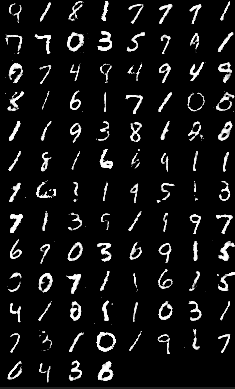

### Data Loader 생성

In [ ]:
batch_size = 100

# MNIST Dataset
transform = transforms.Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]) # -1 ~ 1 사이로 정규화

train_dataset = datasets.MNIST(root='./', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./', train=False, transform=transform, download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Generator와 Discriminator 모델 아키텍처 설계

In [ ]:
import torch.nn.functional as F

# 가짜 생성기
class Generator(nn.Module):
    
    # 코딩타임
    

    
    ##########

# 가짜 판별기
class Discriminator(nn.Module):
    
    # 코딩타임
    

    
    ##########

### 두 모델 G, D 선언

In [ ]:
# build network
z_dim = 100
mnist_dim = train_dataset.train_data.size(1) * train_dataset.train_data.size(2) # 28 * 28 = 784

G = Generator(g_input_dim = z_dim, g_output_dim = mnist_dim).to(device)
D = Discriminator(mnist_dim).to(device)

### Optimizer, Loss Function 선언

In [ ]:
# loss
criterion = nn.BCELoss()

# optimizer
lr = 0.0002
G_optimizer = torch.optim.Adam(G.parameters(), lr = lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr = lr)

### Generator 학습 알고리즘 제작

In [ ]:
# from torch.autograd import Variable

def G_train(x):
    #=======================Train the generator=======================#
    
    # 코딩타임
    

    
    ##########
        
    return G_loss.data.item()

### Discriminator 학습 알고리즘 제작

In [ ]:
def D_train(x):
    #=======================Train the discriminator=======================#
    
    # 코딩타임
    
    D.zero_grad()

    # 진짜 정보로 Discriminator 학습


    
    # 가짜 정보로 Discriminator 학습

    
    ##########
        
    return  D_loss.data.item()

### 1 epoch씩 학습시키며, 결과 출력하기!

In [ ]:
from torchvision.utils import save_image

n_epoch = 20
cnt = 0
for epoch in range(1, n_epoch+1):           
    D_losses, G_losses = [], []
    for batch_idx, (x, _) in enumerate(train_loader):
        D_losses.append(D_train(x))
        G_losses.append(G_train(x))

    print_dis_loss = round(float(torch.mean(torch.FloatTensor(G_losses))), 5)
    print_gen_loss = round(float(torch.mean(torch.FloatTensor(D_losses))), 5)
    print('[{}/{}]: loss_discre.: {}, loss_gen.: {}'.format(epoch, n_epoch, print_dis_loss, print_gen_loss))

    with torch.no_grad():
        test_z = torch.randn(batch_size, z_dim).to(device)
        generated = G(test_z)
        img_path = './GAN_MNIST.png'
        save_image(generated.view(generated.size(0), 1, 28, 28), img_path)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        plt.figure(figsize=(10,10))
        plt.imshow(img)
        plt.title('Epoch: {}'.format(epoch))
        plt.show()
    cnt += 1
    
print('어쩌면...GAN을 과제에 사용할 수 있을지도...? >_<')

#### 고생 많으셨습니다. 좋은 결과 있기를 바랍니다.